In [21]:
import matplotlib.pyplot as plt
from skimage import io
from scipy.signal import convolve
import numpy as np
import matplotlib.patches as patches

%matplotlib inline

In [3]:
def show(img, kernel, resultado, titulo):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  plot = [img, kernel, resultado]
  titulos = ['Imagem', titulo, 'Mapa de Ativação']
  for k, ax in enumerate(axs):
    ax.imshow(plot[k], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(titulos[k])

  for i, line in enumerate(kernel):
    for j, col in enumerate(line):
      axs[1].text(j, i, '{:.2f}'.format(col), fontsize=12, color='red', ha='center', va='center')

In [4]:
!wget https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg

--2025-01-10 16:43:11--  https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg
Resolving s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)... 52.217.119.120, 52.216.25.46, 52.216.36.96, ...
Connecting to s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)|52.217.119.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82709 (81K) [image/jpeg]
Saving to: ‘GUI.jpg’

GUI.jpg             100%[===================>]  80.77K  --.-KB/s    in 0.05s   

2025-01-10 16:43:11 (1.55 MB/s) - ‘GUI.jpg’ saved [82709/82709]



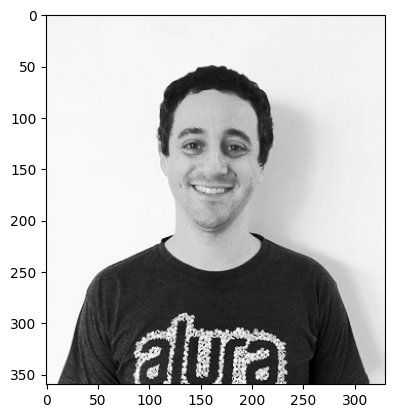

In [5]:
img = io.imread('GUI.jpg')
img = img[:,:,0]
plt.imshow(img, cmap='gray')

In [8]:
kernel_media = np.zeros((9,9))
kernel_media[:] = 1.0/(3**2)

print(kernel_media)

[[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]]


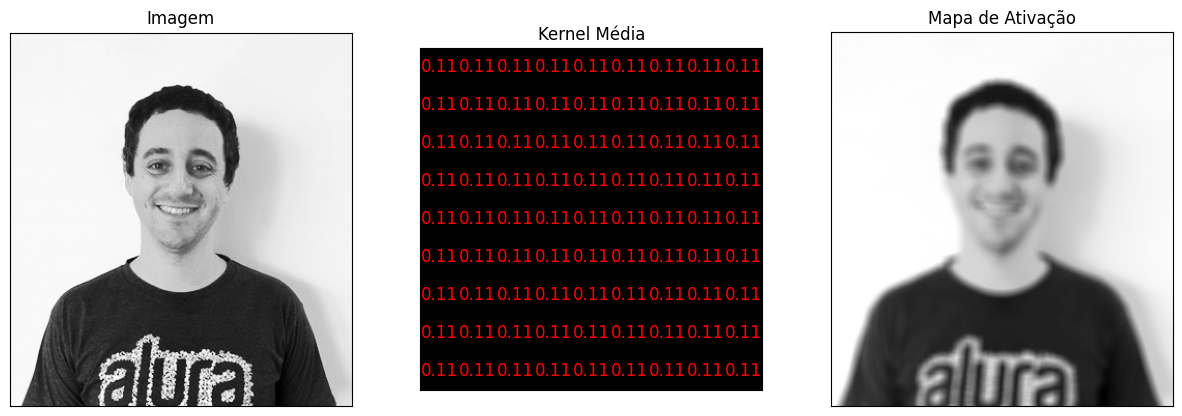

In [9]:
resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel Média')

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


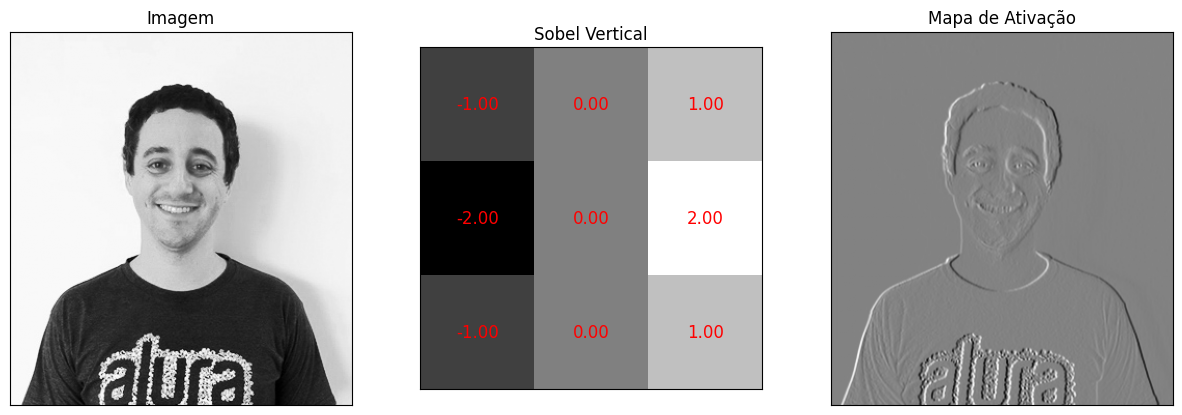

In [12]:
sobel_v = np.zeros((3,3))
sobel_v[:, 0] = -1
sobel_v[:, 2] = 1
sobel_v[1, [0,2]] = [-2,2]
print(sobel_v)
resultado = convolve(img, sobel_v, mode='valid')
show(img, sobel_v, resultado, 'Sobel Vertical')

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


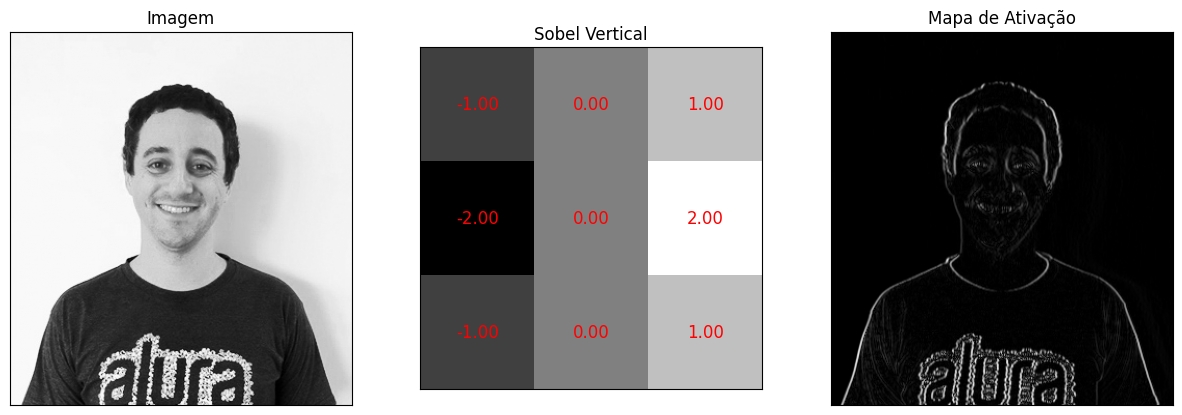

In [13]:
sobel_v = np.zeros((3,3))
sobel_v[:, 0] = -1
sobel_v[:, 2] = 1
sobel_v[1, [0,2]] = [-2,2]
print(sobel_v)
resultado = convolve(img, sobel_v, mode='valid')
show(img, sobel_v, abs(resultado), 'Sobel Vertical')

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


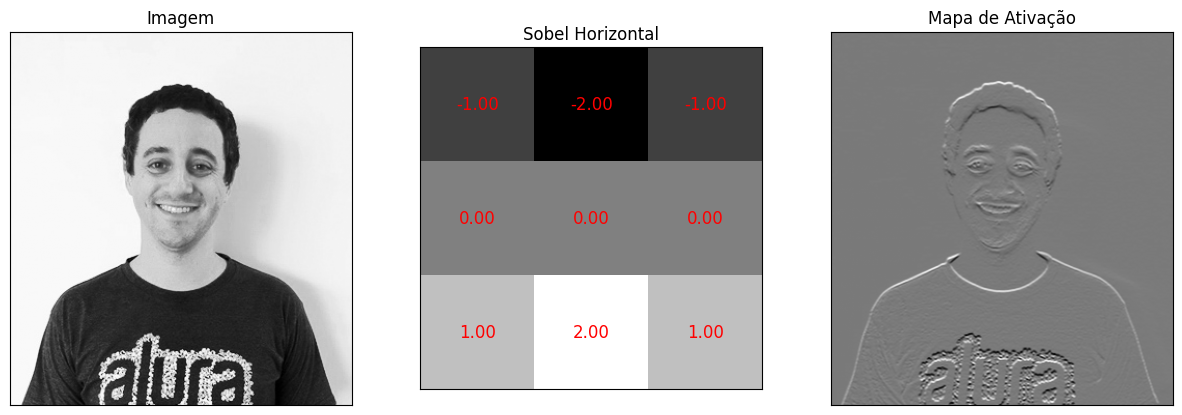

In [14]:
sobel_h = np.zeros((3,3))
sobel_h[0, :] = -1
sobel_h[2, :] = 1
sobel_h[[0,2], 1] = [-2,2]
print(sobel_h)
resultado = convolve(img, sobel_h, mode='valid')
show(img, sobel_h, resultado, 'Sobel Horizontal')

[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


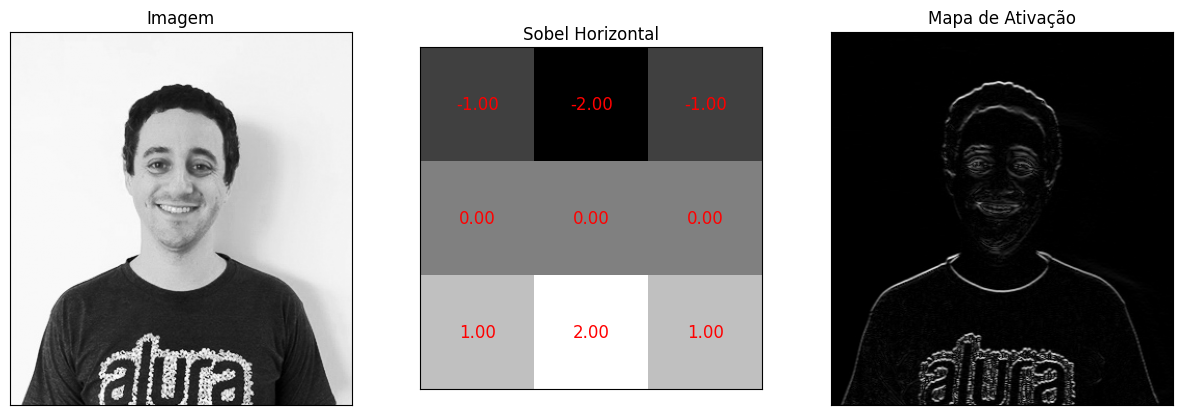

In [15]:
sobel_h = np.zeros((3,3))
sobel_h[0, :] = -1
sobel_h[2, :] = 1
sobel_h[[0,2], 1] = [-2,2]
print(sobel_h)
resultado = convolve(img, sobel_h, mode='valid')
show(img, sobel_h, abs(resultado), 'Sobel Horizontal')

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


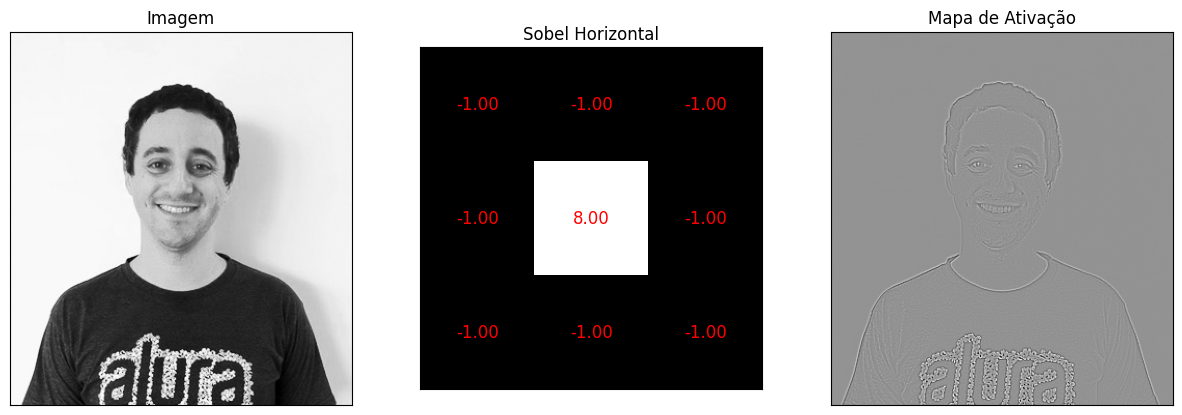

In [17]:
laplace = np.ones((3,3)) * -1
laplace[1,1] = 8
print(laplace)
resultado = convolve(img, laplace, mode='valid')
show(img, laplace, resultado, 'Sobel Horizontal')

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]


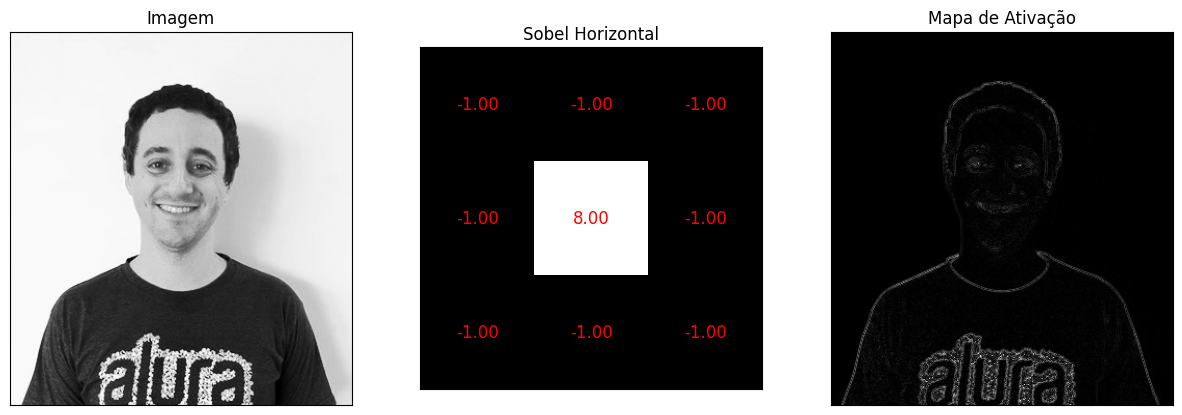

In [18]:
laplace = np.ones((3,3)) * -1
laplace[1,1] = 8
print(laplace)
resultado = convolve(img, laplace, mode='valid')
show(img, laplace, abs(resultado), 'Sobel Horizontal')

---

In [19]:
!wget https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
!mv image_2007_000032.jpg?dl=0 plane.jpg

--2025-01-10 17:03:31--  https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/4bkbp9cta3rjw3qniyla3/image_2007_000032.jpg?rlkey=1d75pv8h17uzw8gyag4o67ksq&dl=0 [following]
--2025-01-10 17:03:32--  https://www.dropbox.com/scl/fi/4bkbp9cta3rjw3qniyla3/image_2007_000032.jpg?rlkey=1d75pv8h17uzw8gyag4o67ksq&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce90367d432b4d40ae1b9fe0e38.dl.dropboxusercontent.com/cd/0/inline/Ch78w03vHkrttNiWigmm6MC9m8dGSqnCBDIiflNizb0sfzq7m9FsmBJY-JrgcjXH3kyIFGZ-ZkVvoCPYX5wsU0qB9DA4QHvfEVmkIv5n-eXnBPOImyom_iYn1lnPOCjNtPI/file# [following]
--2025-01-10 17:03:32--  https://uce90367d432b4d40ae1b9fe0e38.dl.dropboxusercont

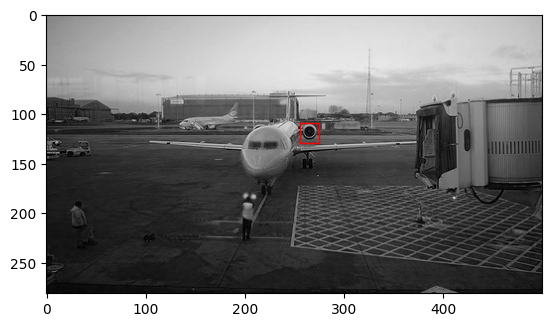

In [27]:
img = io.imread('plane.jpg')
img = img[:,:,0]
retangulo = [109, 129, 255, 275]

fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

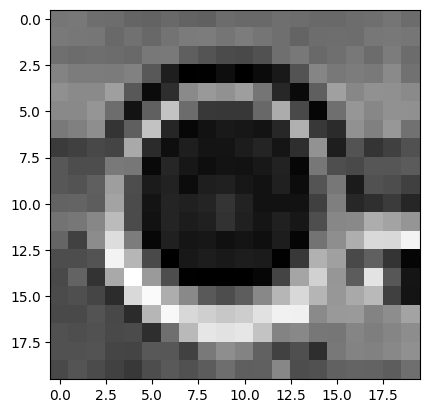

In [28]:
patch = img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]]
patch = patch - patch.mean()
patch = np.flip(patch)

plt.imshow(patch, cmap='gray')

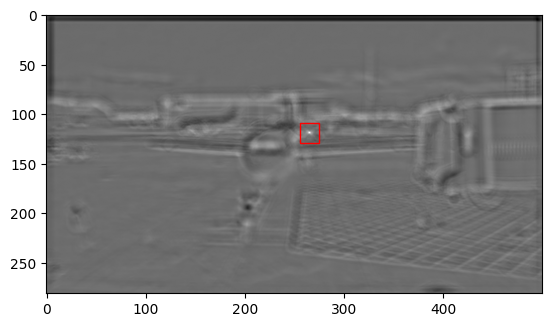

In [30]:
resultado = convolve(img, patch, mode='same')

fig, ax = plt.subplots()
ax.imshow(resultado, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))